In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [2]:
# define a piecewise function
def f(x, a, b, c):
    # a: first breakpoint
    # b: second breakpoint
    # c: slope of the middle line
    y = np.zeros_like(x)
    y[x < a] = 0
    y[np.logical_and(x >= a, x < b)] = c * (x[np.logical_and(x >= a, x < b)] - a)
    y[x >= b] = c * (b - a)
    return y

[2.         5.55794471 5.07294812]


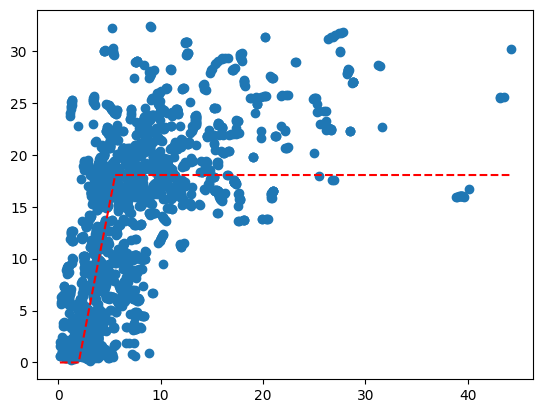

In [20]:
# import csv data
df = pd.read_csv('data.csv').sort_values(by=['gap'])
x = df['gap'].values
y = df['speed'].values

# set the bounds
bounds = [[2, 0, 0], [np.inf, np.inf, np.inf]]

# fit the data
popt, pcov = scipy.optimize.curve_fit(f, x, y, p0=[5, 15, 1.5], bounds=bounds)
print(popt)

# plot the data
plt.figure()
plt.plot(x, y, 'o')
plt.plot(x, f(x, *popt), 'r--')
plt.show()
